In [1]:
%load_ext autoreload
%autoreload 2    

In [2]:
import os
import sys
import numpy as np
import scipy as sp
import pandas as pd
import h5py
import matplotlib.pyplot as plt

In [3]:
sys.path.insert(0, '../')

In [136]:
from lv.base.basegrid import BaseGrid

In [137]:
b = BaseGrid("B")

In [138]:
b.load_grid()

(2204,) (5760, 2204) (5760, 5)


In [139]:
b.prepare()

#220 R=1000.00
Building RBF with gaussan kernel on logflux shape (5760, 220)
[8.46555368e+08 4.92634967e+07 1.75059149e+07 8.31591110e+06
 3.00994212e+06 2.65124476e+06 1.94828465e+06 1.46673730e+06
 8.21216730e+05 5.48020710e+05]


In [284]:
a = np.random.uniform(0,1,(10,5))

In [285]:
a

array([[0.08980726, 0.57354736, 0.668362  , 0.26877669, 0.94592706],
       [0.17462384, 0.83634987, 0.56474433, 0.8453251 , 0.37619946],
       [0.25244161, 0.69832845, 0.10268347, 0.37596921, 0.34810389],
       [0.96663551, 0.78786657, 0.27125283, 0.89598407, 0.91744325],
       [0.61531557, 0.33725722, 0.13984326, 0.37482263, 0.733666  ],
       [0.04156566, 0.45469823, 0.19521687, 0.91800788, 0.51436363],
       [0.51760762, 0.10174337, 0.83928736, 0.21608834, 0.49068348],
       [0.62511301, 0.49554777, 0.58734393, 0.31040648, 0.4682412 ],
       [0.69093765, 0.08924818, 0.28120625, 0.16031847, 0.75312649],
       [0.73295118, 0.65247955, 0.70464653, 0.69142826, 0.23700639]])

In [286]:
a* b.bnds[:,0] + b.bnds[:,2]

array([[ 7.75481841e-01,  6.62144471e+03,  2.83672400e+00,
         1.04841748e+00,  5.13518235e-01],
       [ 5.63440402e-01,  8.39536159e+03,  2.62948867e+00,
         6.16006176e-01,  6.55950135e-01],
       [ 3.68895982e-01,  7.46371702e+03,  1.70536693e+00,
         9.68023089e-01,  6.62974029e-01],
       [-1.41658879e+00,  8.06809934e+03,  2.04250566e+00,
         5.78011949e-01,  5.20639187e-01],
       [-5.38288915e-01,  5.02648624e+03,  1.77968651e+00,
         9.68883025e-01,  5.66583501e-01],
       [ 8.96085847e-01,  5.81921304e+03,  1.89043375e+00,
         5.61494089e-01,  6.21409091e-01],
       [-2.94019058e-01,  3.43676776e+03,  3.17857472e+00,
         1.08793374e+00,  6.27329131e-01],
       [-5.62782514e-01,  6.09494742e+03,  2.67468785e+00,
         1.01719514e+00,  6.32939701e-01],
       [-7.27344136e-01,  3.35242521e+03,  2.06241250e+00,
         1.12976115e+00,  5.61718377e-01],
       [-8.32377942e-01,  7.15423698e+03,  2.90929306e+00,
         7.31428805e-01

In [140]:
pmt = b.test["pmt"]

In [181]:
b.normlog = 0
NL = 100
obsflux, obsvar = b.make_obs_from_pmt(pmt, NL)
flux0 = b.getModel(pmt)

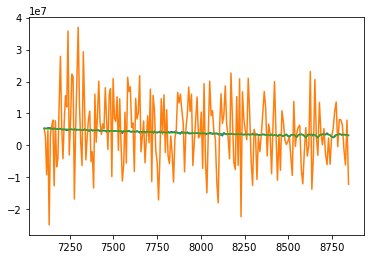

In [211]:
plt.plot(b.wave, obsflux)
plt.plot(b.wave, flux0 + NL*noise0)
plt.plot(b.wave, flux0)

In [184]:
obsfluxs + 100 * 

array([[ 26845584.47208619,  13797489.563587  , -20413632.35315032, ...,
         11399177.16682929, -10454641.88891119, -17008609.13556499],
       [ 63005279.2383654 ,  -5858090.88798251,  21336650.91276264, ...,
         33359415.87489131,  -6326365.44651491, -17087399.56393076],
       [ -5092518.27481155, -40793507.8391289 ,  -9702451.26725624, ...,
         -1517492.65711676,   1458069.78747049,  27814319.82155943],
       ...,
       [  4848347.58356901, -11144124.83671057,  -7236237.52429051, ...,
         23557989.89204087,  12906063.16440652,  -4853116.69637789],
       [-15030348.77708873,  -8326375.79026619,  40844878.15566343, ...,
         -2244488.9537868 ,   8817536.86994004,  -8007729.03343476],
       [  7219986.00065282,  -2391431.8903414 ,  -2352628.61175569, ...,
         -7719126.63423602,  16324730.21072796,   6157743.37290276]])

Fitting with Template T8500G25Mm20Ap03Cp00
estimate 7819.589361548424


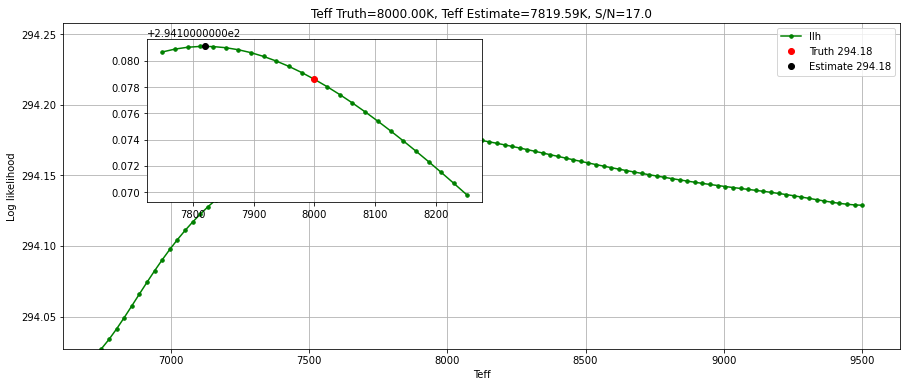

In [148]:
x=8000
temp_pmt = [-2.0, 8500, 2.5, 0.0, 0.25]
_=b.eval_pmt_on_axis(temp_pmt, x, obsflux, obsvar, axis="T")

Fitting with Template T8000G25Mm20Ap03Cp00
estimate -2.6879882812500018


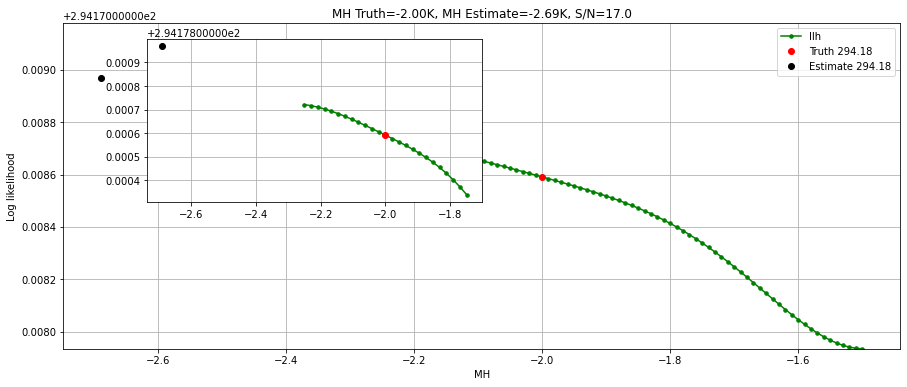

In [149]:
x=-2.0
temp_pmt = [-2.0, 8000, 2.5, 0.0, 0.25]
_=b.eval_pmt_on_axis(temp_pmt, x, obsflux, obsvar, axis="M")

Fitting with Template T8000G25Mm20Ap03Cp00
estimate 2.4930603027343743


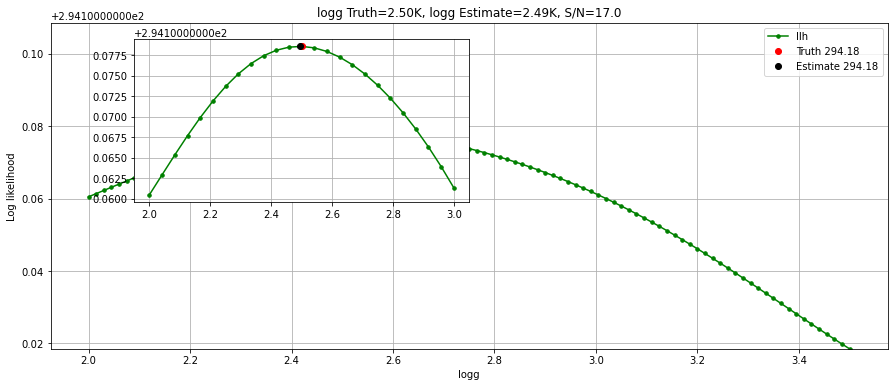

In [150]:
x=2.5
temp_pmt = [-2.0, 8000, 2.5, 0.0, 0.25]
_=b.eval_pmt_on_axis(temp_pmt, x, obsflux, obsvar, axis="G")

Fitting with Template T8000G25Mm20Ap03Cp00
estimate 7969.15078163147


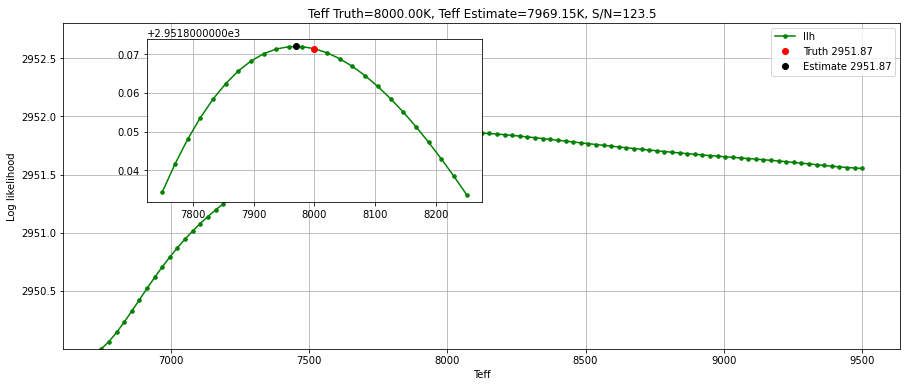

In [112]:
x=8000
temp_pmt = [-2.0, 8000, 2.5, 0.0, 0.25]
_=b.eval_pmt_on_axis(temp_pmt, x, obsflux, obsvar, axis="T")

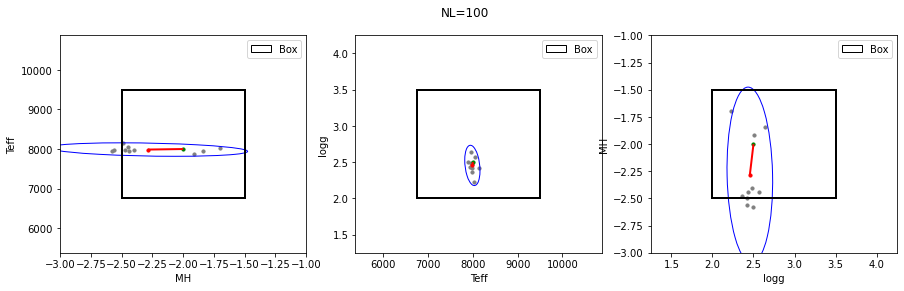

In [264]:
pdxs = [0,1,2]
Xs = b.eval_LLH_at_pmt(pmt, pdxs=pdxs, N_test=10, noise_level=100)

# NL=1
b.eval_LLH(NL, N_pmt=10)

In [289]:
rvarr = 200*(np.random.rand(5)-0.5)
nlarr = b.Util.makeNLArray(flux0, b.Obs.sky_in_res, step=0)

In [290]:
nlarr

array([171.2633015 ,  76.60889254,  46.90854562,  28.80088499,
        12.51249877])

100%|██████████| 10/10 [03:06<00:00, 18.63s/it]


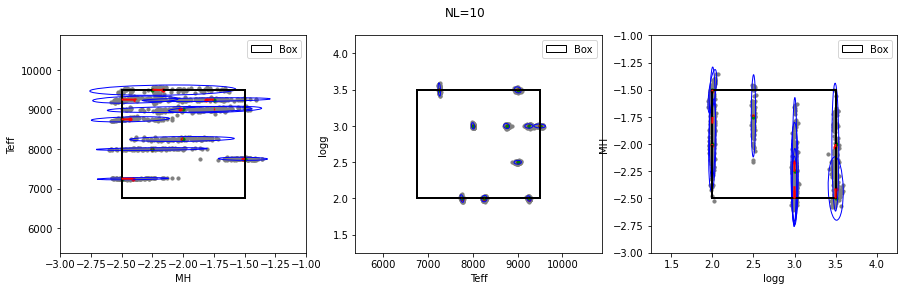

In [275]:
NL=10
b.eval_LLH(NL, N_pmt=10)

100%|██████████| 10/10 [03:10<00:00, 19.09s/it]


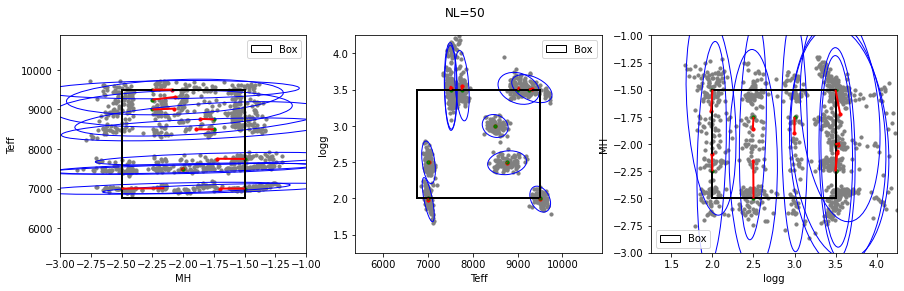

In [276]:
NL=50
b.eval_LLH(NL, N_pmt=10)

100%|██████████| 10/10 [03:07<00:00, 18.79s/it]


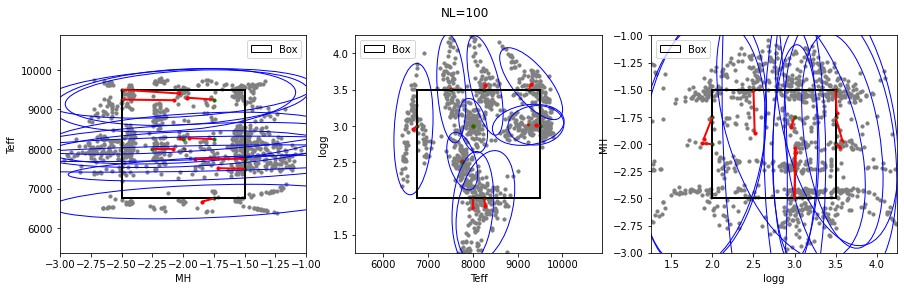

In [278]:
NL=100
b.eval_LLH_NL(NL, N_pmt=10)

In [269]:
np.random.choice(b.para, 4)

ValueError: a must be 1-dimensional

In [271]:
np.random.randint(0, len(b.para), 4)

array([2899, 2273, 2362, 2037])

In [247]:
Xs.shape

(10, 3)

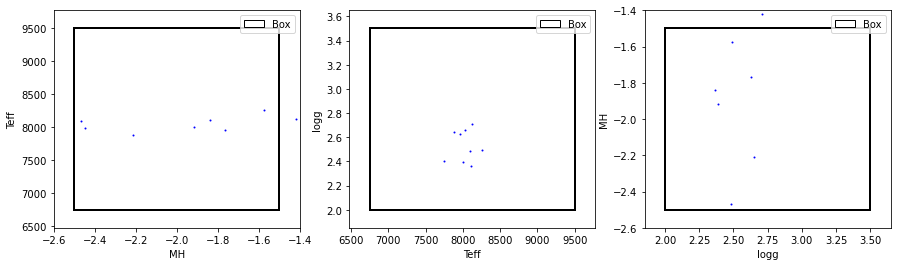

In [256]:
b.plot_box(pdxs, Xs,)

In [245]:
b.bnds

array([[-2.500e+00, -1.500e+00,  1.000e+00,  2.500e-01, -2.000e+00],
       [ 6.750e+03,  9.500e+03,  2.750e+03,  2.500e+02,  8.125e+03],
       [ 2.000e+00,  3.500e+00,  1.500e+00,  5.000e-01,  2.750e+00],
       [-7.500e-01,  5.000e-01,  1.250e+00,  2.500e-01, -1.250e-01],
       [-2.500e-01,  5.000e-01,  7.500e-01,  2.500e-01,  1.250e-01]])

In [214]:
obsfluxs , obsvar0 = b.make_obs_from_pmt_N(pmt, 50, 10)

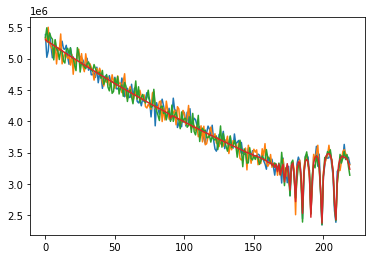

In [215]:
plt.plot(obsfluxs[0])
plt.plot(obsfluxs[1])
plt.plot(obsfluxs[2])
plt.plot(flux0)

In [ ]:
fn = b.get_eval_LLH_fn(pdx, )

In [64]:
pvals, fluxs, obsfluxs, obsvars = b.RBF_generator(100000, 100, save=1)

-2.5 -1.5 6750.0 9500.0 2.0 3.5 -0.75 0.5 -0.25 0.5 /datascope/subaru/user/swei20/data/pfsspec/train/pfs_stellar_model/dataset/LLH/bosz_5000_BHB_NL10_100k.h5


In [81]:
pvals, fluxs, obsfluxs, obsvars = b.RBF_generator(10000, 100, save=1)

-2.5 -1.5 6750.0 9500.0 2.0 3.5 -0.75 0.5 -0.25 0.5 /datascope/subaru/user/swei20/data/pfsspec/train/pfs_stellar_model/dataset/LLH/bosz_5000_BHB_NL100_10k.h5


In [82]:
pvals, fluxs, obsfluxs, obsvars = b.RBF_generator(1000, 100, save=1)

-2.5 -1.5 6750.0 9500.0 2.0 3.5 -0.75 0.5 -0.25 0.5 /datascope/subaru/user/swei20/data/pfsspec/train/pfs_stellar_model/dataset/LLH/bosz_5000_BHB_NL100_1k.h5


In [30]:
from lv.dnn.dnn_LLH import DNN_LLH

2021-12-01 11:26:35.949361: I tensorflow/compiler/jit/xla_cpu_device.cc:41] Not creating XLA devices, tf_xla_enable_xla_devices not set


In [66]:
d = DNN_LLH()

In [69]:
NL=10
d.prepare("B", NL)

In [72]:
d.run_R0("B", d.top, ep=100)

Layers: [10, 64, 32, 16, 5]
| EP 100 |loss: 0.0134 | mean_: 0.0134 | val_l: 0.0075 | val_m: 0.0075 | lr: 0.0100 | 


In [73]:
NL = 10
normlog = 0
x_flux,x_var = b.make_obs_from_pmt(pmt, NL, normlog=normlog)

In [77]:
x_test = b.Util.normlog_flux_i(x_flux)
pmt0 = d.predict(x_test)[0]

In [78]:
pmt0

array([-2.01147369e+00,  7.92901441e+03,  2.43542404e+00, -2.75100470e-02,
        2.63596579e-01])

Fitting with Template T7929G24Mm20Ap03Cm00
estimate 7950.738936662674


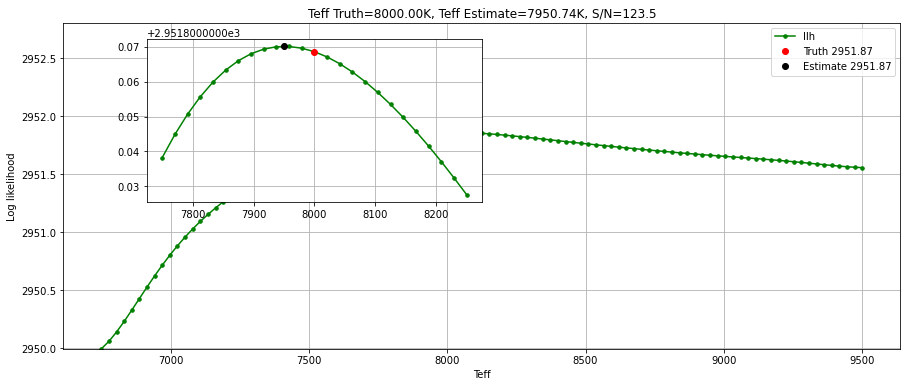

In [79]:
x=8000
_=b.eval_pmt_on_axis(pmt0, x,x_flux,x_var, axis="T")

Fitting with Template T7929G24Mm20Ap03Cm00
estimate 2.4777526855468746


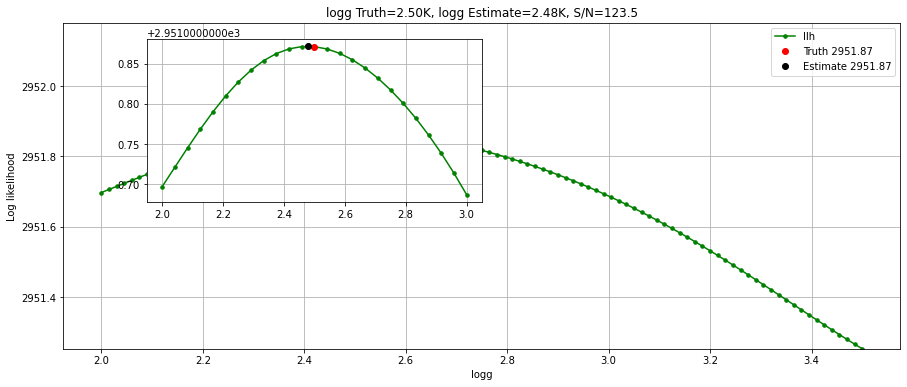

In [80]:
x=2.5
_=b.eval_pmt_on_axis(pmt0, x, x_flux,x_var, axis="G")

In [63]:
pmt

array([-2.0e+00,  8.0e+03,  2.5e+00,  0.0e+00,  2.5e-01])

In [ ]:
x=8000
temp_pmt = [-2.0, 8000, 2.5, 0.0, 0.25]
_=b.eval_pmt_on_axis(temp_pmt, x, obsflux, obsvar, axis="T")